# Análisis descriptivo y visualizaciones📈

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#Configuración presetnación de datos
pd.set_option("display.max_columns", None) # Mostrar todas las columnas
pd.set_option("display.max_rows", 150) # Mostrar más filas
pd.set_option("display.width", 180) # Evita saltos de lineas raros
pd.set_option("display.float_format", lambda x: f'{x:,.4f}') #Formato de número
pd.set_option('display.max_colwidth', None) # Evitar que Pandas corte el contenido de las celdas

## 1. Carga del DataSet maestro 📁

In [7]:
df = pd.read_excel("../data/processed/DataSet_master_trata_personas_enero2017_septiembre2025.xlsx")
print(f'DataSet cargado correctamente.')

DataSet cargado correctamente.


## 2. Revisión general del DataSet📏

In [13]:
print(f'Dimesiones del dataset:{df.shape}')
print('-' * 100)
df.info()

Dimesiones del dataset:(878, 99)
----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 99 columns):
 #   Column                                                            Non-Null Count  Dtype         
---  ------                                                            --------------  -----         
 0   AÑO                                                               878 non-null    int64         
 1   MES                                                               878 non-null    int64         
 2   FECHA                                                             878 non-null    datetime64[ns]
 3   AÑO_MES                                                           878 non-null    object        
 4   CCDD                                                              878 non-null    int64         
 5   DEPARTAMENTO                              

## 3. Estadísticas descriptivas básicas🧱

In [15]:
print (df.describe().T)

                                                                    count                           mean                  min                  25%                  50%  \
AÑO                                                              878.0000                     2,020.4886           2,017.0000           2,018.0000           2,020.0000   
MES                                                              878.0000                         6.1082               1.0000               3.0000               6.0000   
FECHA                                                                 878  2020-11-29 16:32:15.307516928  2017-01-01 00:00:00  2018-07-01 00:00:00  2020-09-01 00:00:00   
CCDD                                                             878.0000                        13.4818               1.0000               8.0000              14.0000   
CAPTACION_C_INTERNET                                             878.0000                         0.2517               0.0000               0.000

## 4. Distribución por casos 🕰️

In [17]:
casos_año = df.groupby("AÑO")["TOTAL_CASOS"].sum()
print(f'Casos por año:\n{casos_año}')

Casos por año:
AÑO
2017    725
2018    734
2019    509
2020    372
2021    535
2022    631
2023    583
2024    669
2025    384
Name: TOTAL_CASOS, dtype: int64


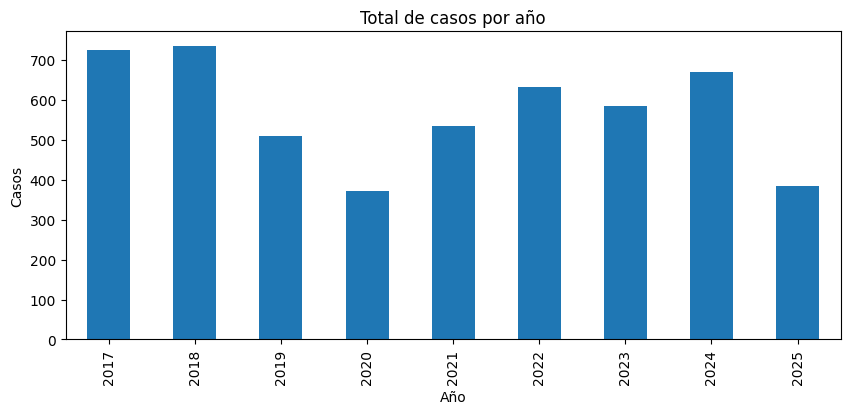

In [18]:
plt.figure(figsize=(10,4))
casos_año.plot(kind="bar")
plt.title("Total de casos por año")
plt.ylabel("Casos")
plt.xlabel("Año")
plt.show()

## 5. Casos por mes 📅

In [19]:
casos_mensuales = df.groupby("AÑO_MES")["TOTAL_CASOS"].sum()
print(f'Casos mensuales:\n{casos_mensuales}')

Casos mensuales:
AÑO_MES
2017-01     72
2017-02     56
2017-03     72
2017-04    122
2017-05     47
2017-06     62
2017-07     57
2017-08     51
2017-09     37
2017-10     59
2017-11     55
2017-12     35
2018-01     79
2018-02     59
2018-03     52
2018-04     92
2018-05     60
2018-06     89
2018-07     75
2018-08     34
2018-09     41
2018-10     41
2018-11     37
2018-12     75
2019-01     40
2019-02     68
2019-03     30
2019-04     32
2019-05     31
2019-06     41
2019-07     40
2019-08     34
2019-09     48
2019-10     33
2019-11     51
2019-12     61
2020-01     51
2020-02     58
2020-03     31
2020-04      9
2020-05     13
2020-06     19
2020-07     27
2020-08     13
2020-09     45
2020-10     50
2020-11     45
2020-12     11
2021-01     53
2021-02     21
2021-03     41
2021-04     43
2021-05     34
2021-06     87
2021-07     54
2021-08     66
2021-09     31
2021-10     16
2021-11     16
2021-12     73
2022-01     52
2022-02     21
2022-03     25
2022-04     65
2022-05     83


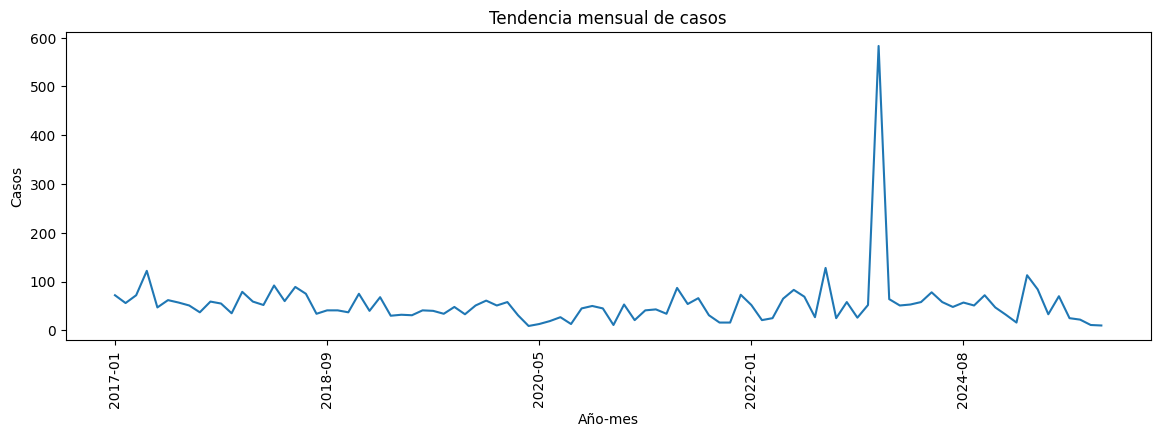

In [22]:
plt.figure(figsize=(14, 4))
casos_mensuales.plot()
plt.title('Tendencia mensual de casos')
plt.ylabel("Casos")
plt.xlabel("Año-mes")
plt.xticks(rotation = 90)
plt.show()

## 6. Top 10 departamentos con más casos 🗺️

In [21]:
casos_departamento = df.groupby("DEPARTAMENTO")["TOTAL_CASOS"].sum().sort_values(ascending=False)
print(f'Casos por departamento:\n{casos_departamento}')

Casos por departamento:
DEPARTAMENTO
LIMA             2769
LAMBAYEQUE        252
CUSCO             219
AREQUIPA          206
HUÁNUCO           190
MADRE DE DIOS     166
PUNO              157
SAN MARTÍN        154
AYACUCHO          152
LORETO            134
CAJAMARCA         120
TACNA             113
JUNÍN             108
PIURA              69
TUMBES             67
LA LIBERTAD        60
PASCO              36
ÁNCASH             35
UCAYALI            34
APURÍMAC           26
ICA                24
AMAZONAS           19
CALLAO             18
MOQUEGUA           10
HUANCAVELICA        4
Name: TOTAL_CASOS, dtype: int64


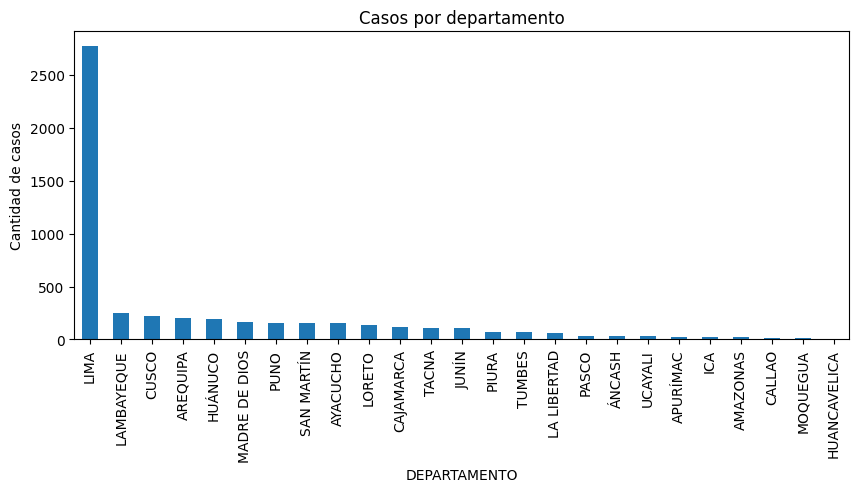

In [24]:
casos_departamento.plot(kind="bar", figsize=(10, 4))
plt.title("Casos por departamento")
plt.ylabel("Cantidad de casos")
plt.show()